0.5
Early stopping at epoch 196


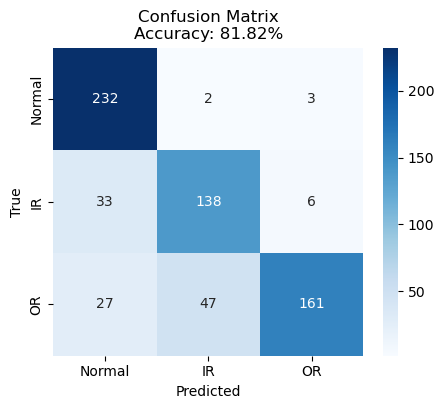

 - Model accuracy: 81.82%


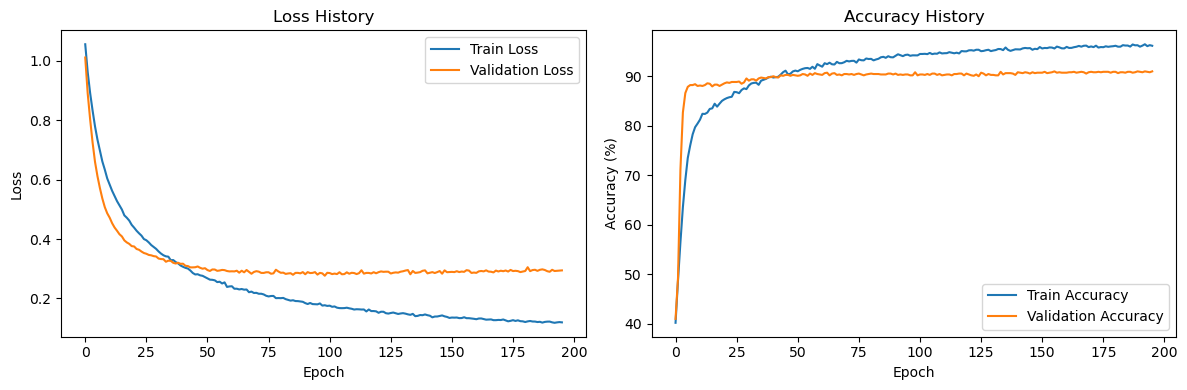

0.5
Early stopping at epoch 317


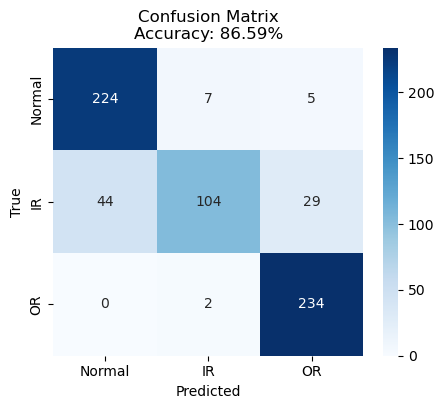

 - Model accuracy: 86.59%


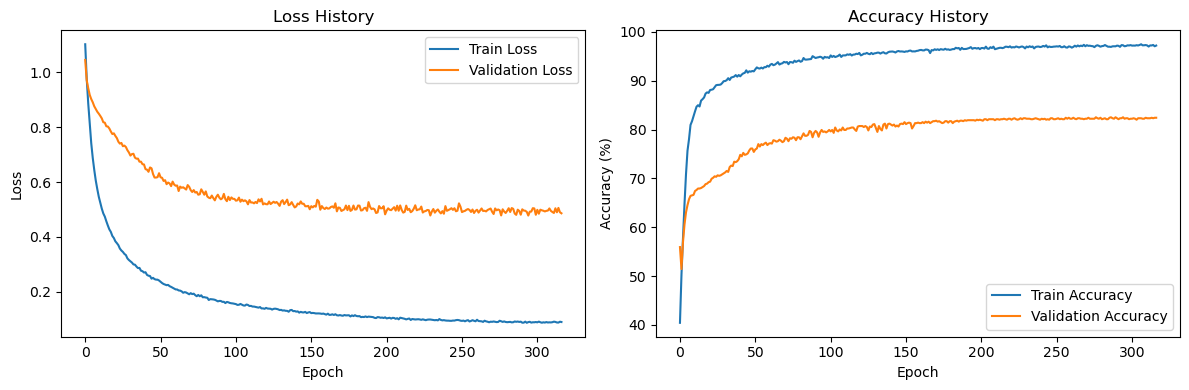

0.5
Early stopping at epoch 173


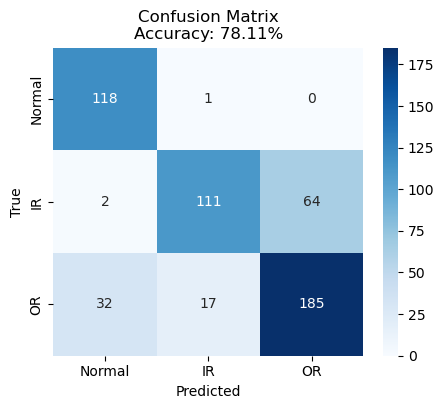

 - Model accuracy: 78.11%


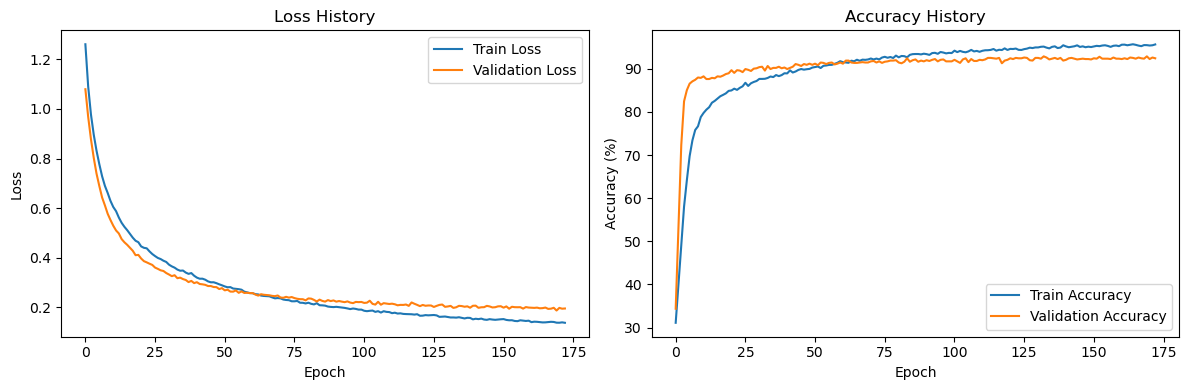

0.5
Early stopping at epoch 171


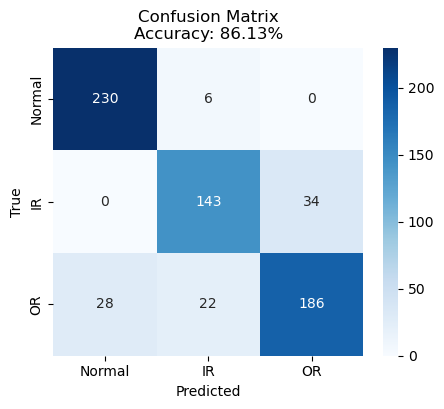

 - Model accuracy: 86.13%


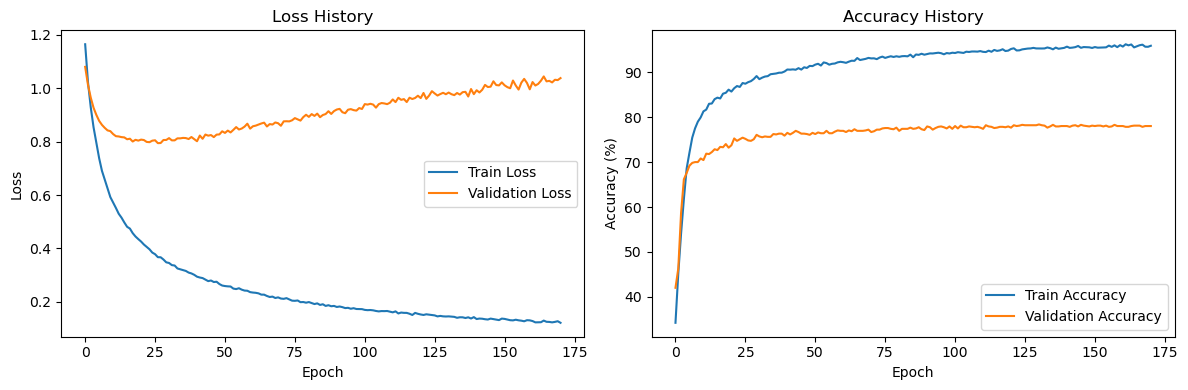

0.5
Early stopping at epoch 151


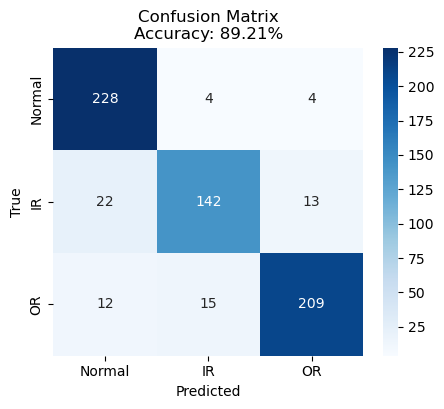

 - Model accuracy: 89.21%


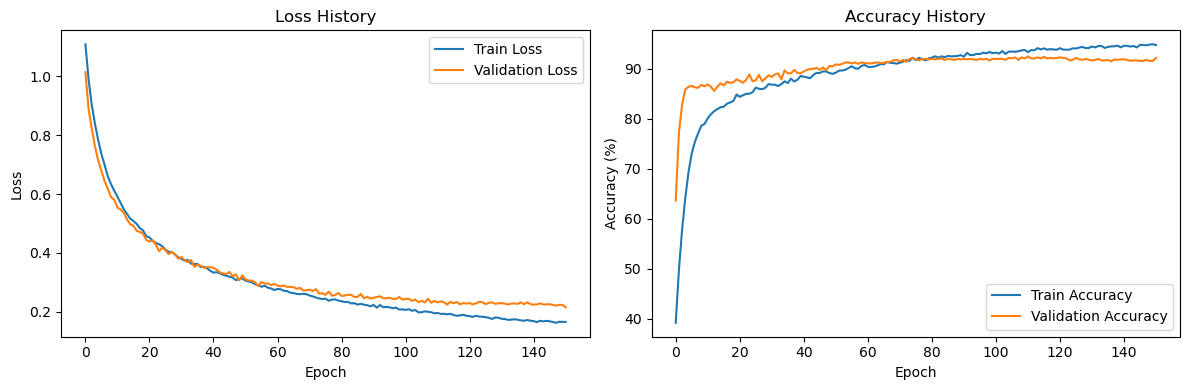

0.5
Early stopping at epoch 223


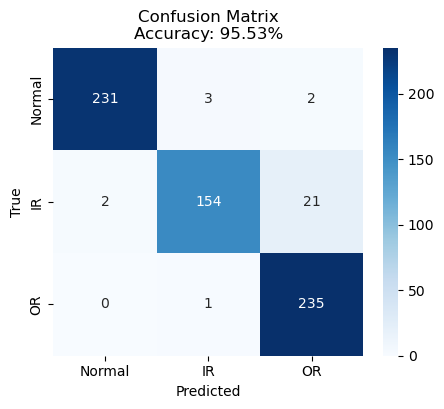

 - Model accuracy: 95.53%


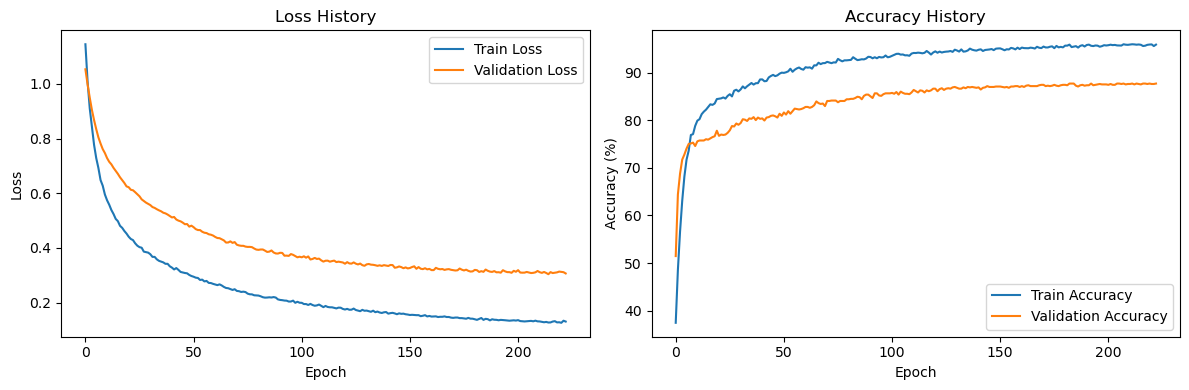

0.5
Early stopping at epoch 211


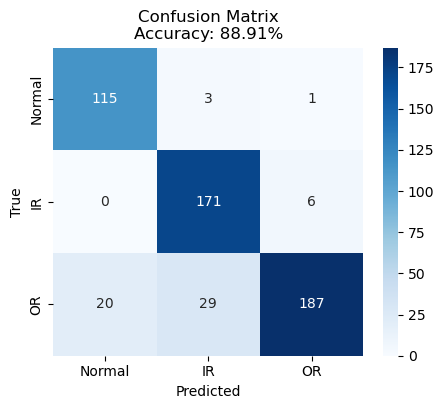

 - Model accuracy: 88.91%


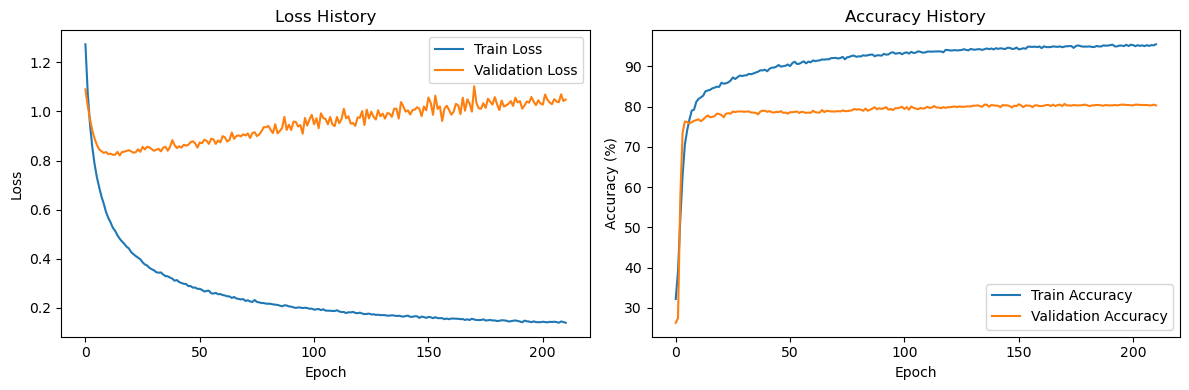

0.5
Early stopping at epoch 113


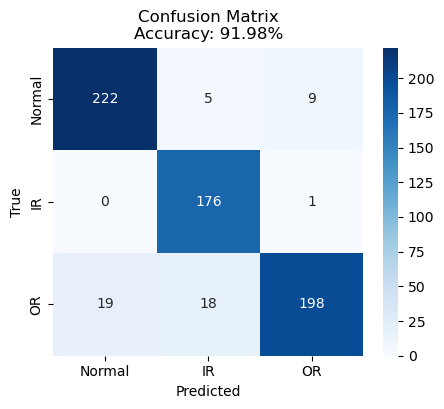

 - Model accuracy: 91.98%


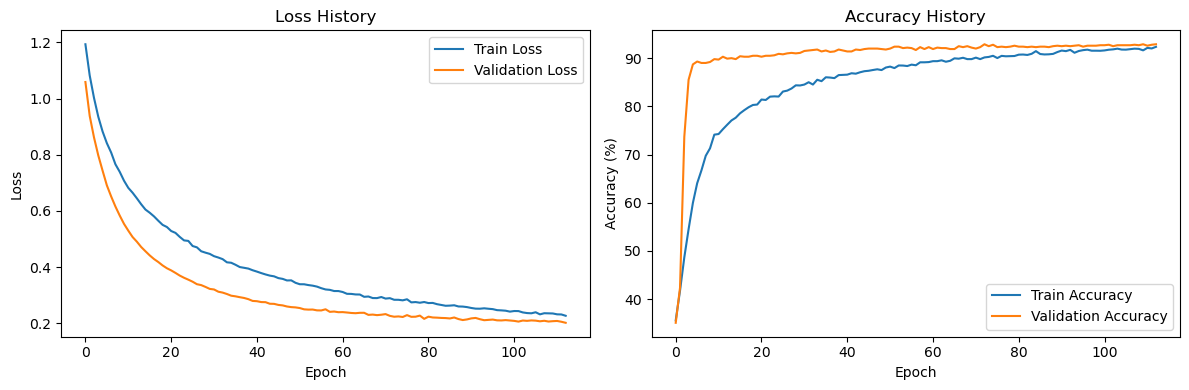

0.5
Early stopping at epoch 307


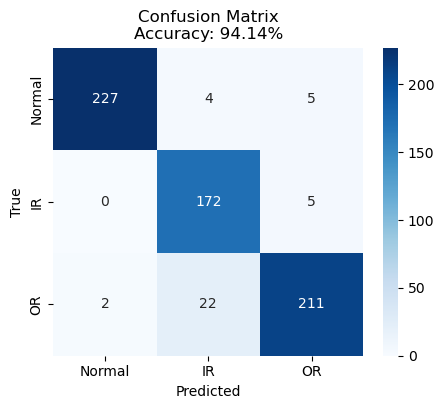

 - Model accuracy: 94.14%


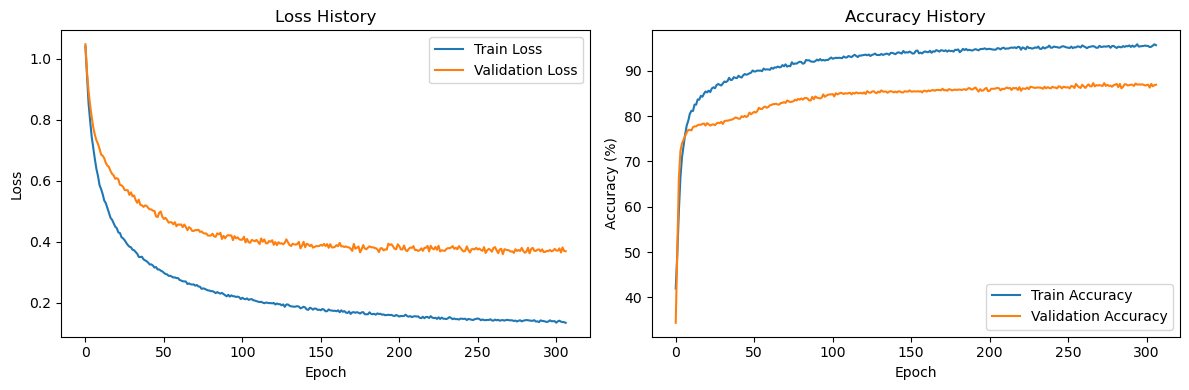

0.5
Early stopping at epoch 263


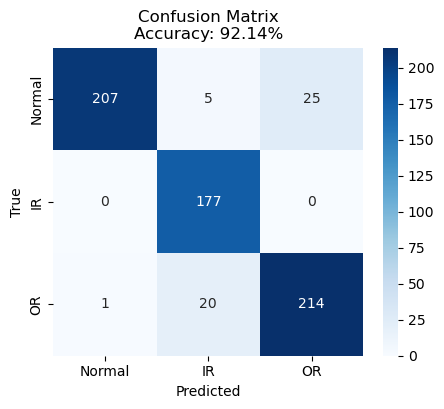

 - Model accuracy: 92.14%


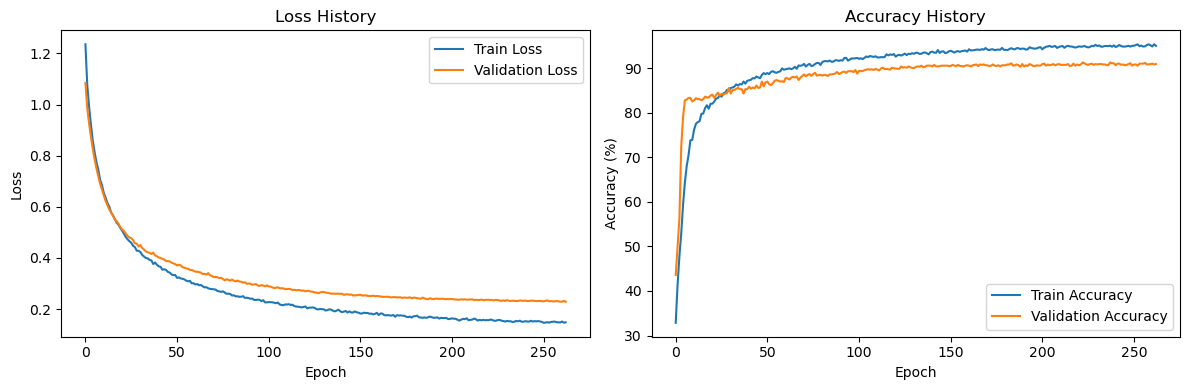

0.5
Early stopping at epoch 156


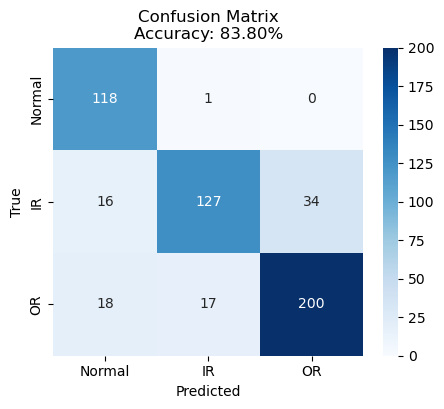

 - Model accuracy: 83.80%


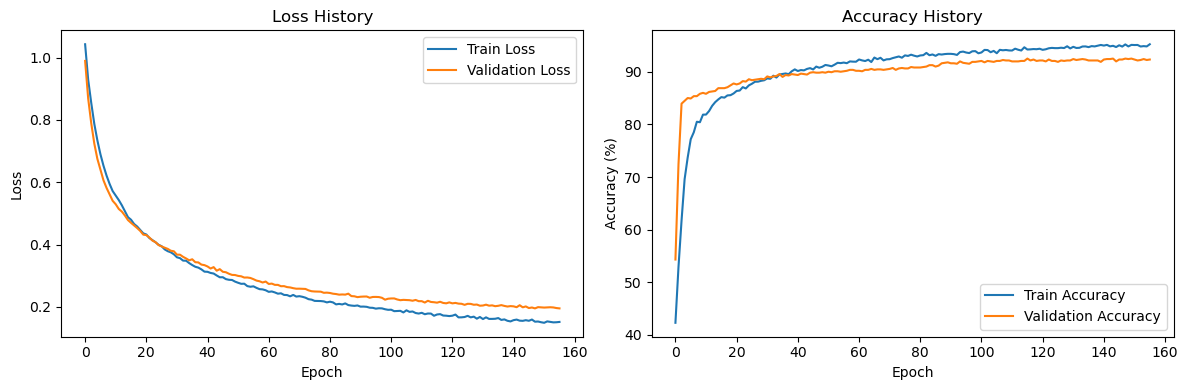

0.5
Early stopping at epoch 235


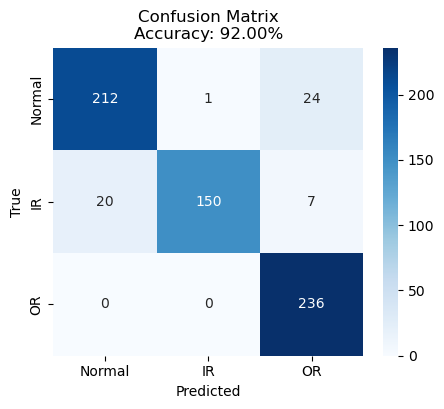

 - Model accuracy: 92.00%


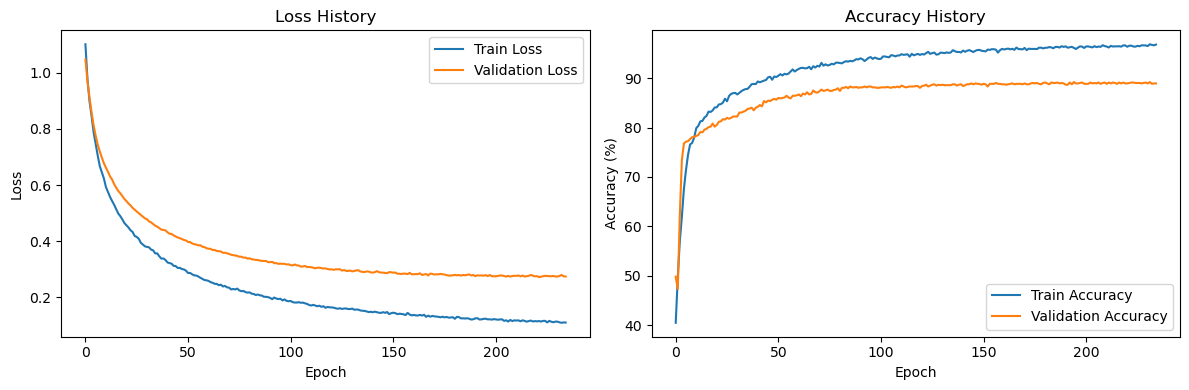

0.5
Early stopping at epoch 193


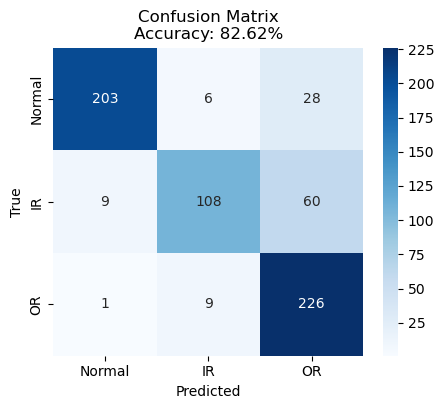

 - Model accuracy: 82.62%


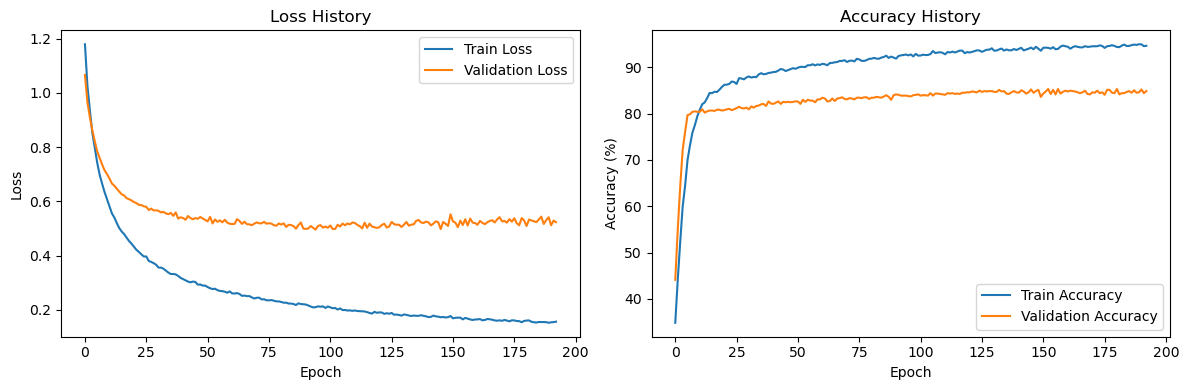

0.5
Early stopping at epoch 141


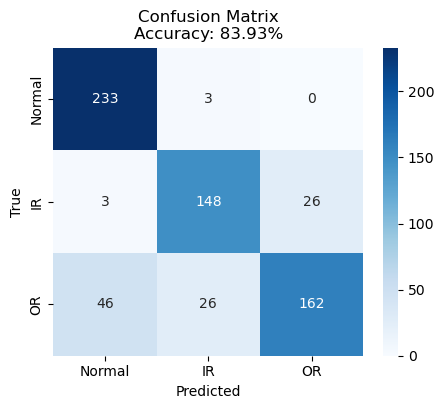

 - Model accuracy: 83.93%


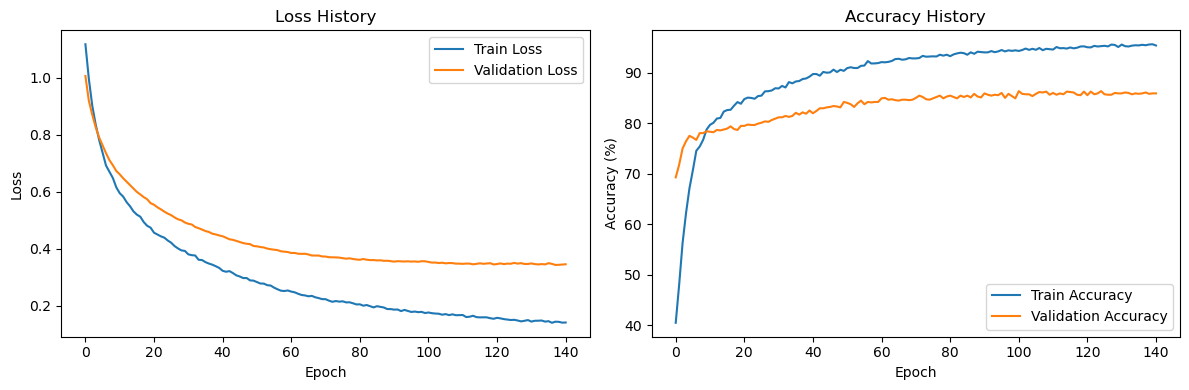

0.5
Early stopping at epoch 140


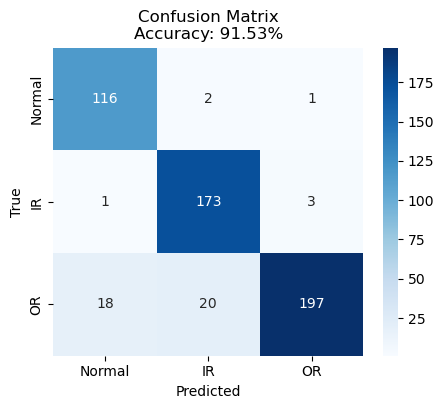

 - Model accuracy: 91.53%


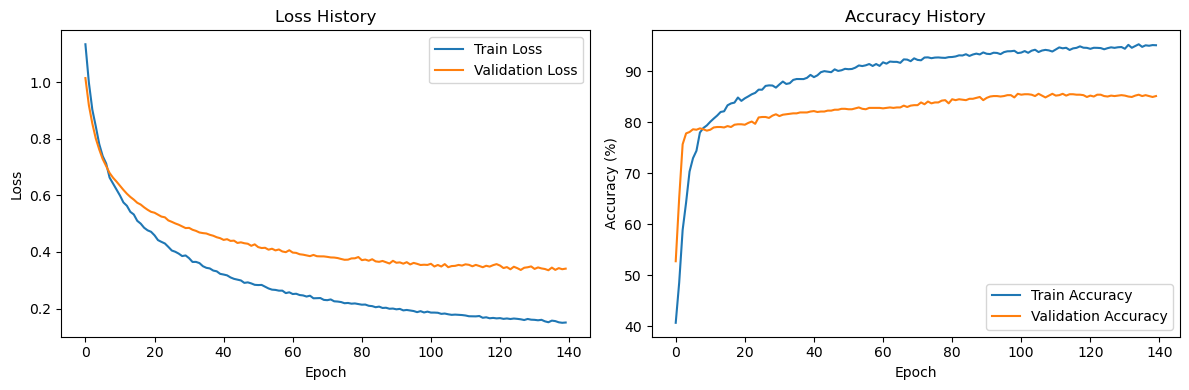

0.5
Early stopping at epoch 110


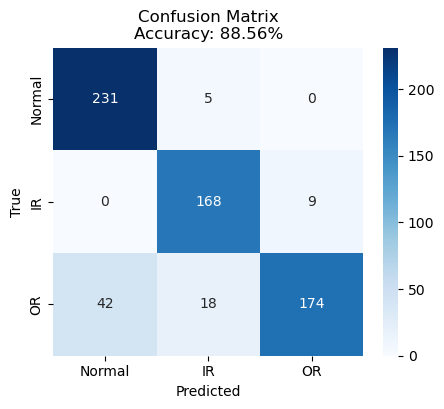

 - Model accuracy: 88.56%


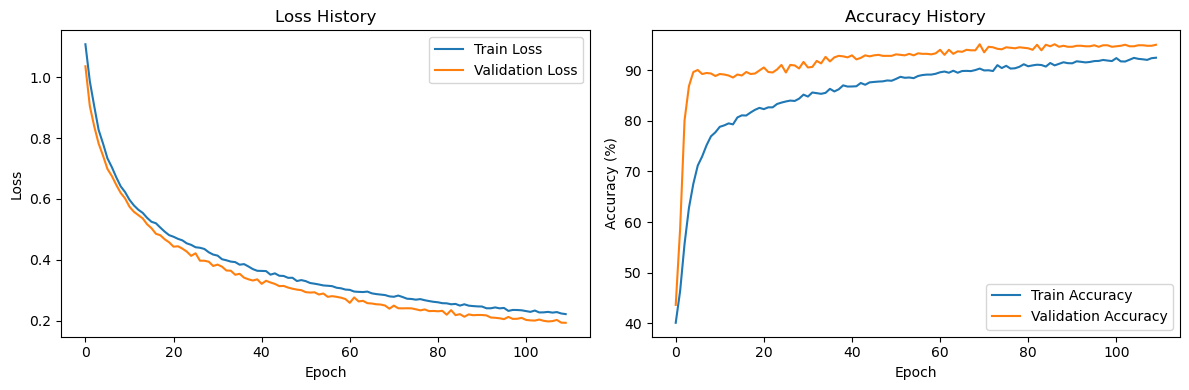

0.5
Early stopping at epoch 114


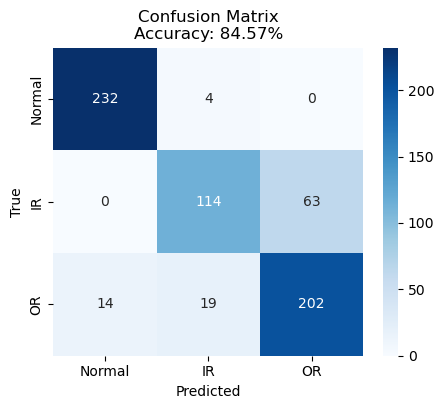

 - Model accuracy: 84.57%


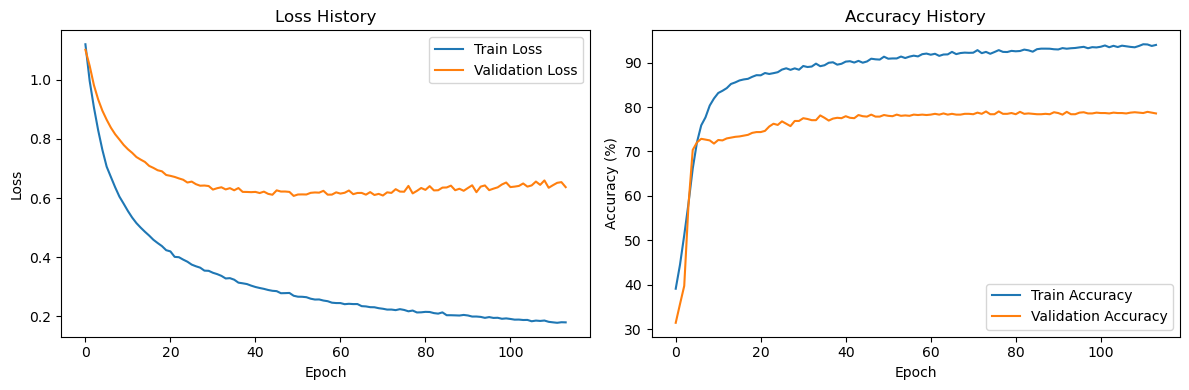

0.5
Early stopping at epoch 194


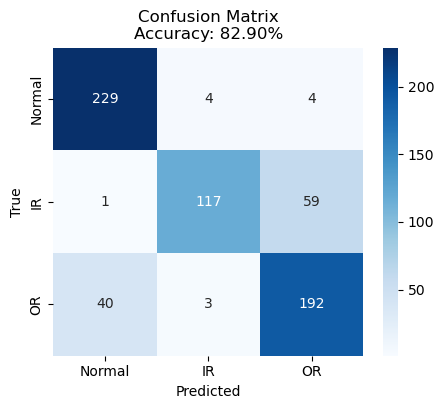

 - Model accuracy: 82.90%


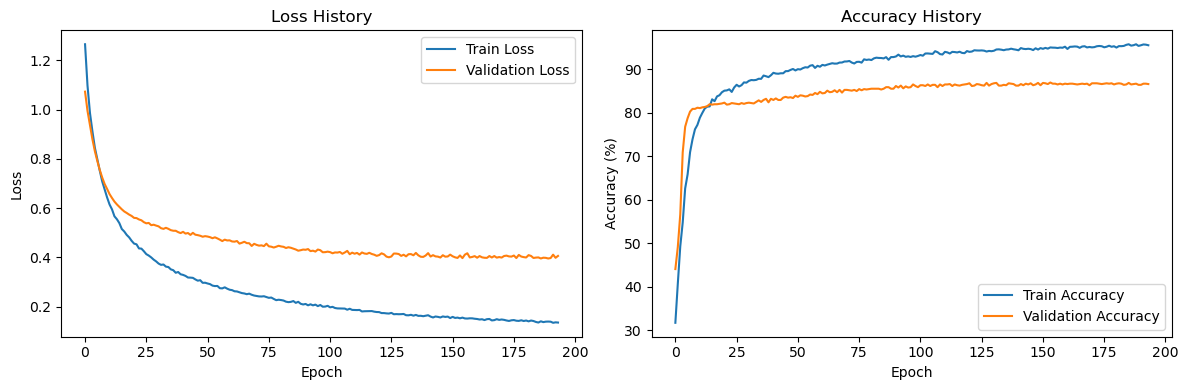

0.5
Early stopping at epoch 251


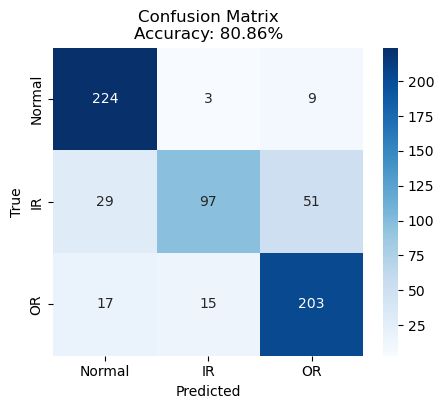

 - Model accuracy: 80.86%


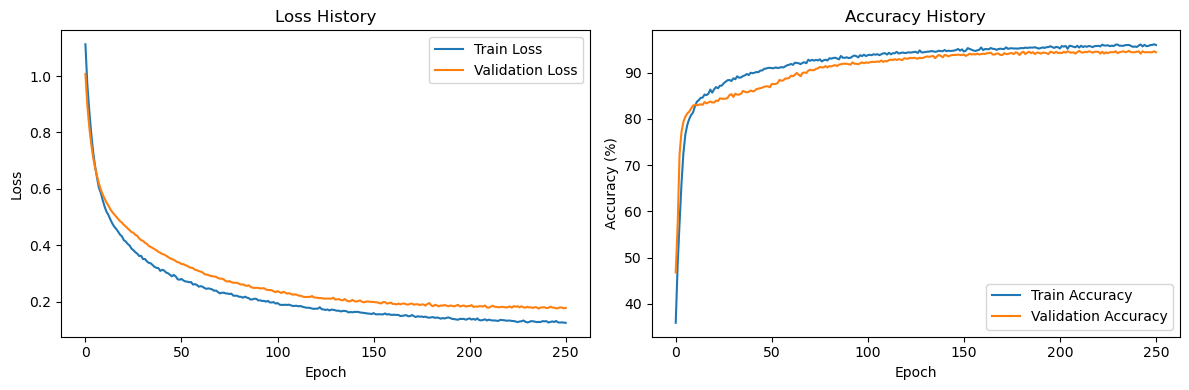

0.5
Early stopping at epoch 290


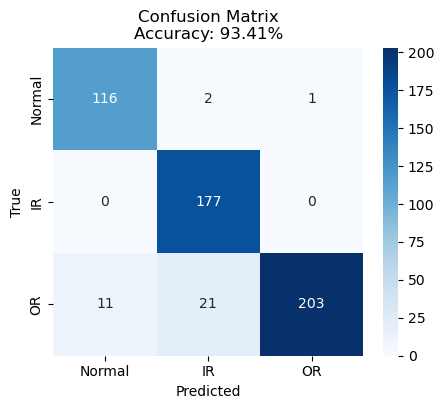

 - Model accuracy: 93.41%


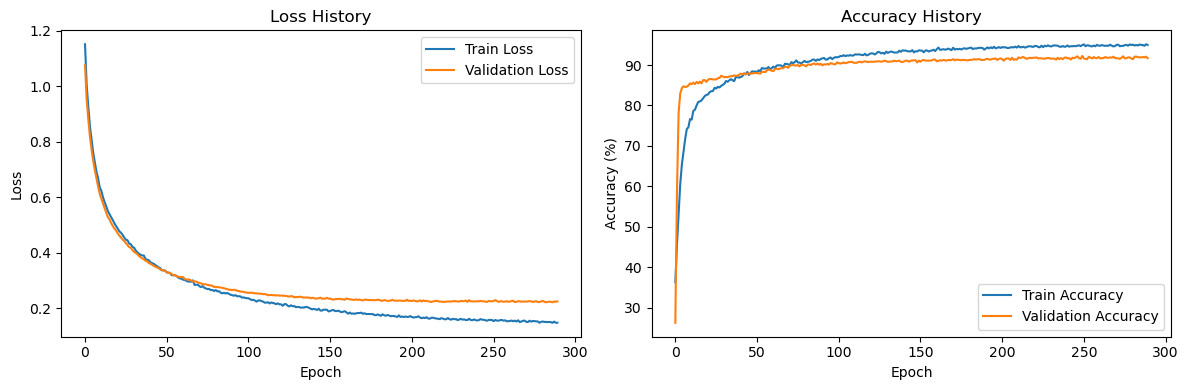

0.5
Early stopping at epoch 175


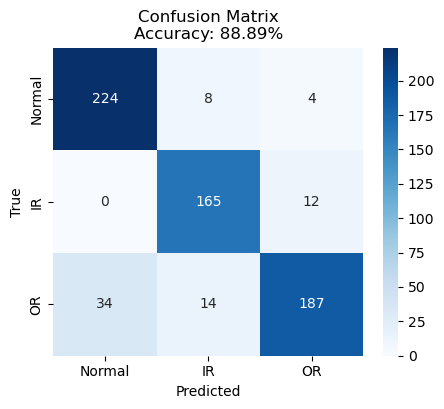

 - Model accuracy: 88.89%


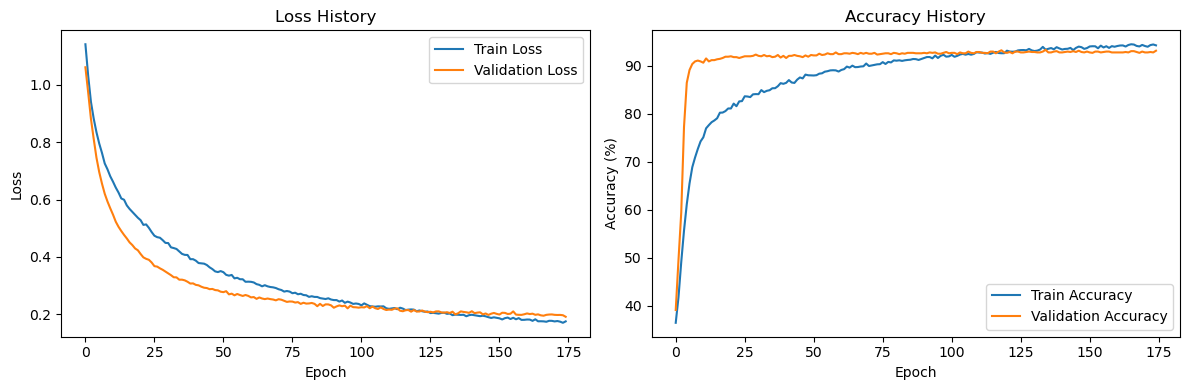

0.5
Early stopping at epoch 176


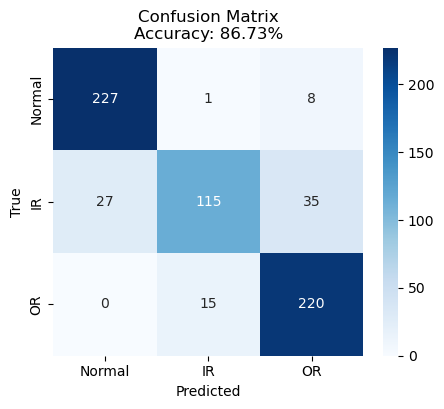

 - Model accuracy: 86.73%


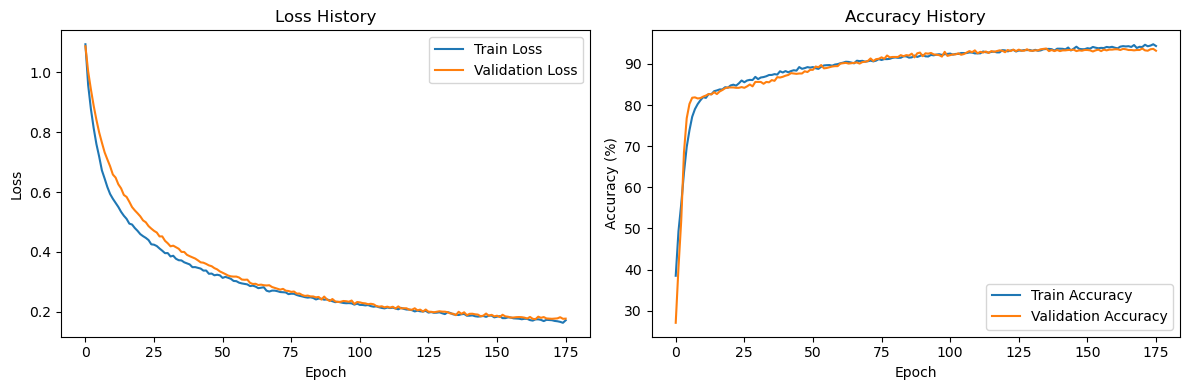

0.5
Early stopping at epoch 314


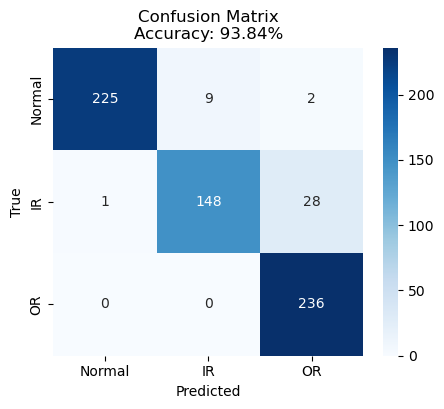

 - Model accuracy: 93.84%


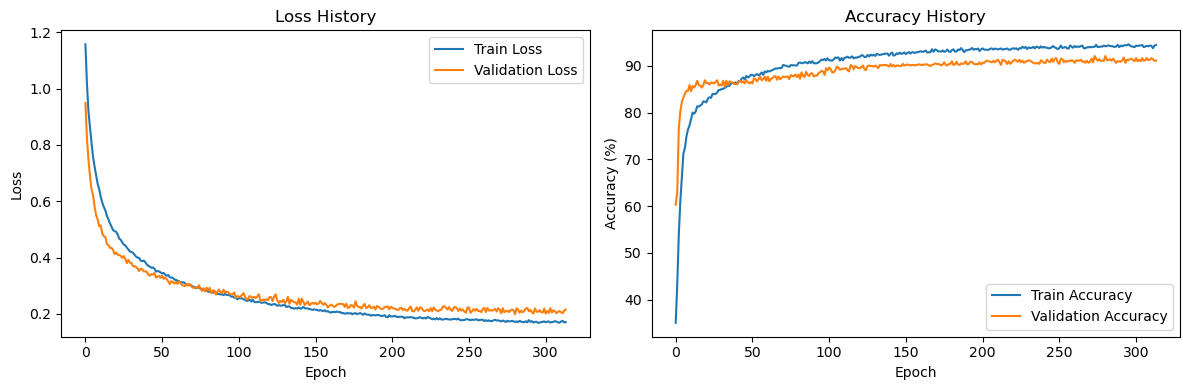

0.5
Early stopping at epoch 102


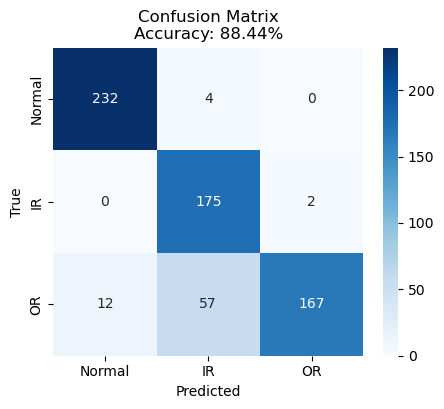

 - Model accuracy: 88.44%


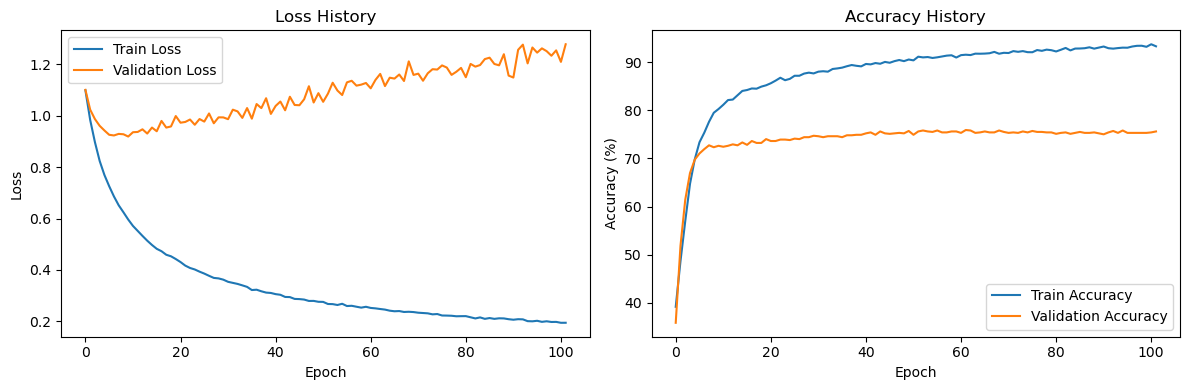

0.5
Early stopping at epoch 322


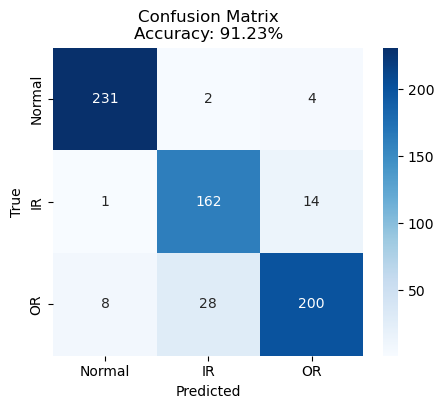

 - Model accuracy: 91.23%


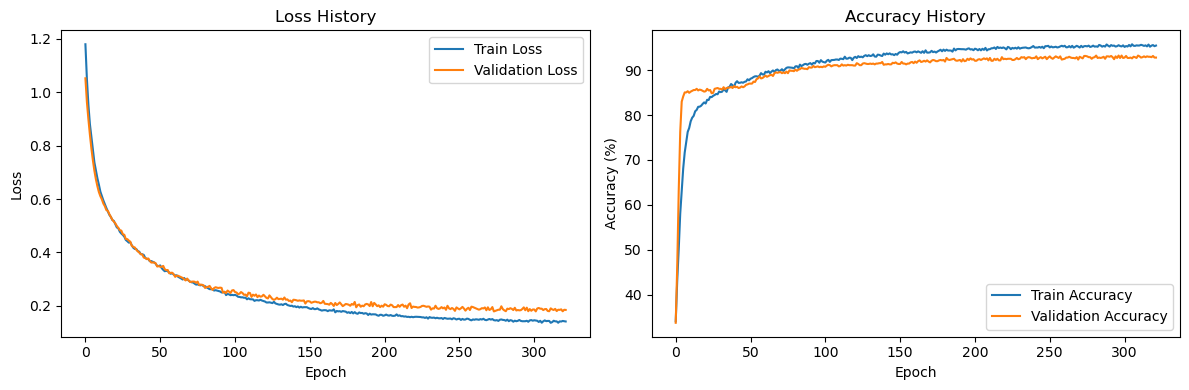

0.5
Early stopping at epoch 225


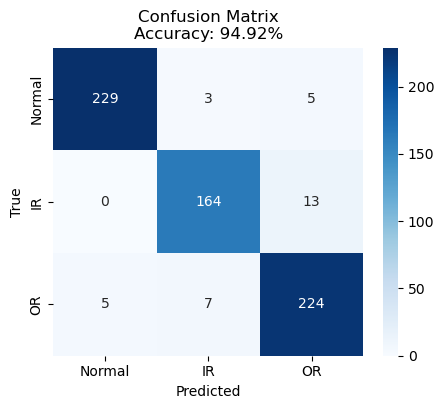

 - Model accuracy: 94.92%


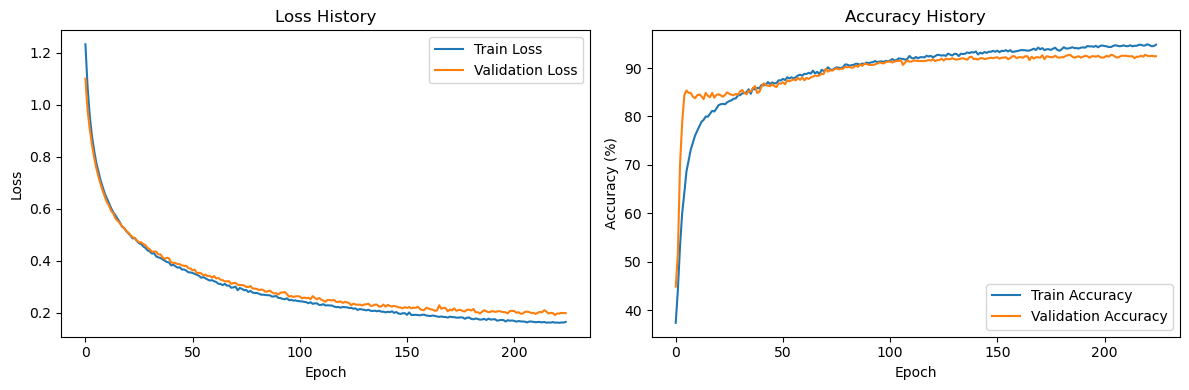

0.5
Early stopping at epoch 122


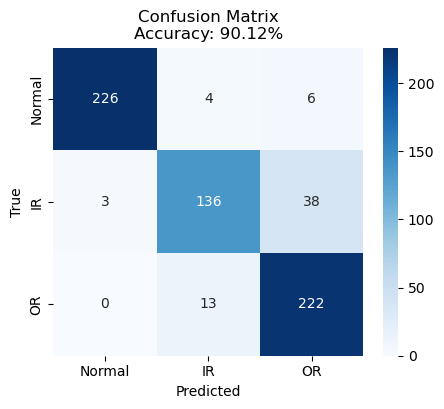

 - Model accuracy: 90.12%


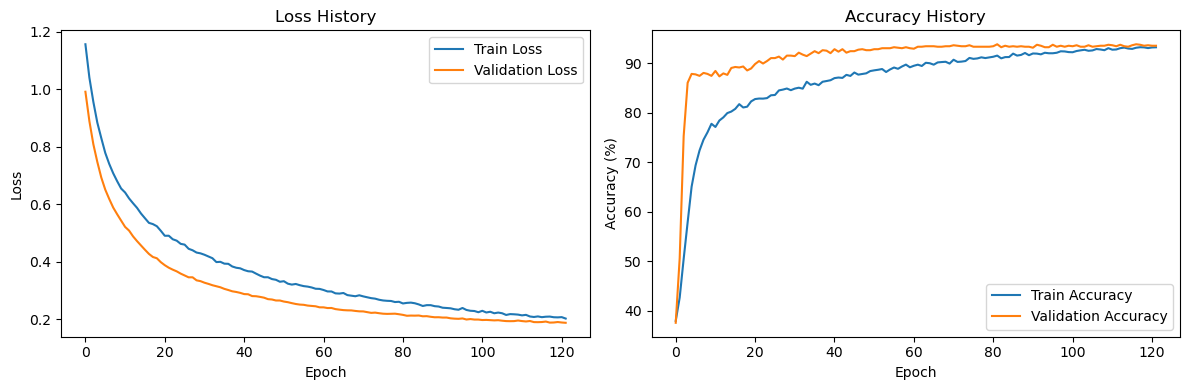

0.5
Early stopping at epoch 244


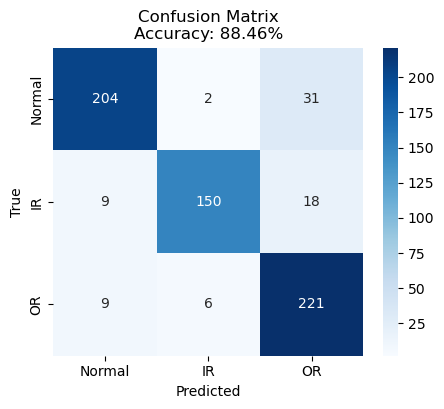

 - Model accuracy: 88.46%


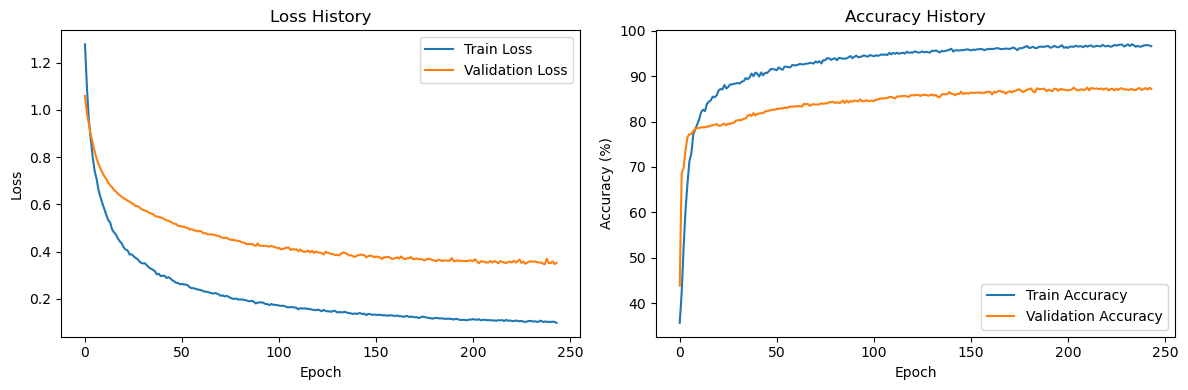

0.5
Early stopping at epoch 293


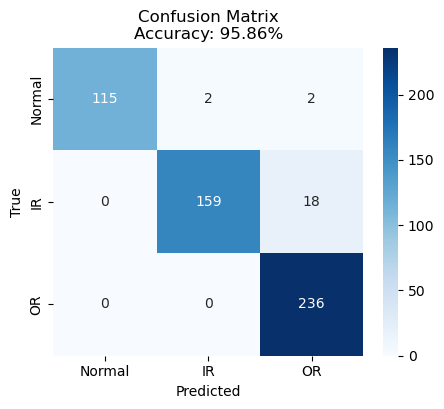

 - Model accuracy: 95.86%


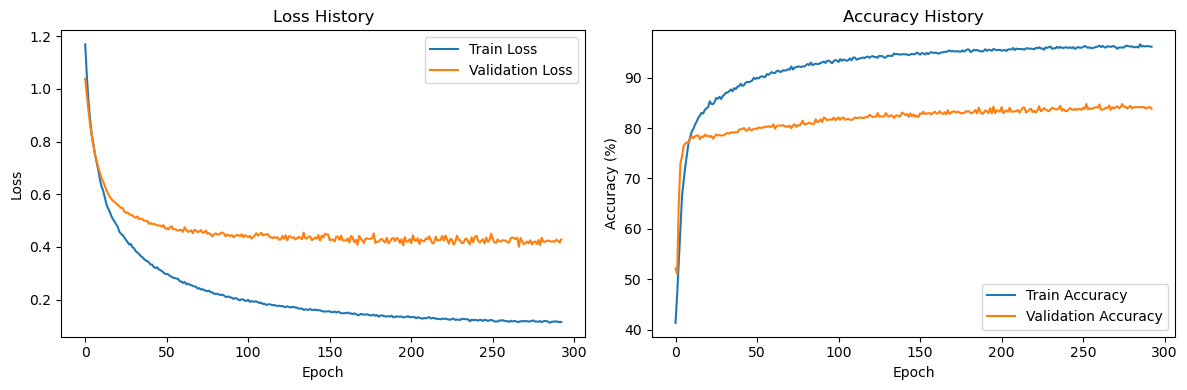

0.5
Early stopping at epoch 181


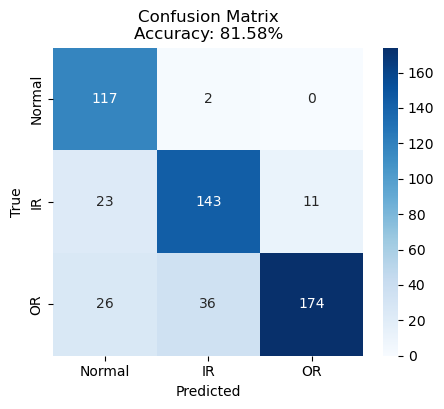

 - Model accuracy: 81.58%


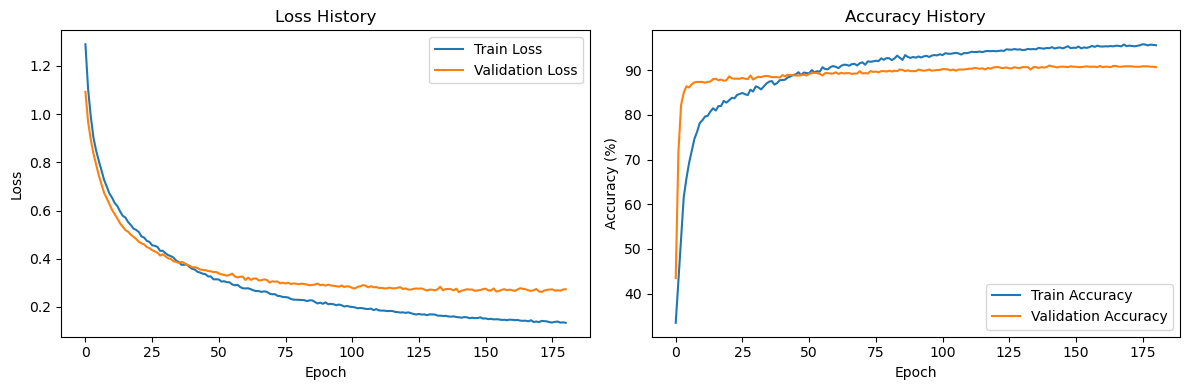

Mean accuracy: 0.8829393727125561
Std accuracy: 0.047653170213212526


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)
    X_train = X_train *1e2
    X_val = X_val *1e2
    X_test = X_test *1e2
    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))